In [207]:
# import basic libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pd.set_option('display.max_colwidth', None)

In [103]:
# specify data file
import pathlib
datafile = pathlib.Path.cwd().parent / "data" / "news_headlines"/ "news_headline_data.csv"

In [123]:
# create data frame
df = pd.read_csv(datafile)

In [124]:
# evaluate data frame
df.head()

,publisher,date,link,article_title
0,breitbart,2021-03-03,https://www.breitbart.com/entertainment/2021/03/03/michael-moore-white-texans-dont-deserve-the-covid-19-vaccine-after-mask-mandate-lifted/,Michael Moore: White Texans Don’t Deserve the COVID-19 Vaccine After Mask Mandate Lifted
1,breitbart,2021-03-04,https://www.breitbart.com/clips/2021/03/04/netanyahu-snl-michael-ches-claim-israel-vaccinated-only-jewish-half-of-population-outrageous/,Netanyahu: SNL Michael Che’s Claim Israel Vaccinated Only ‘Jewish Half’ of Population ‘Outrageous’
2,breitbart,2021-03-06,https://www.breitbart.com/europe/2021/03/06/vaxi-taxis-dashing-around-london-help-boost-vaccine-uptake-among-ethnic-minorities/,"‘Vaxi Taxis’ Dash Around London, Help Boost Vaccine Uptake Among Ethnic Minorities"
3,breitbart,2021-03-06,https://www.breitbart.com/faith/2021/03/06/catholic-scholars-reassert-moral-acceptability-receiving-covid-19-vaccines/,Catholic Scholars Reassert ‘Moral Acceptability of Receiving COVID-19 Vaccines’
4,breitbart,2021-03-05,https://www.breitbart.com/health/2021/03/05/anthony-fauci-military-members-skipping-vaccine-are-inadvertently-part-of-the-problem/,Anthony Fauci: Military Members Skipping Vaccine Are Inadvertently ‘Part of the Problem’


In [125]:
df.dtypes

publisher        object
date             object
link             object
article_title    object
dtype: object

In [127]:
# convert date column to date time
df.date = pd.to_datetime(df.date,errors='coerce')
df.dtypes

publisher                object
date             datetime64[ns]
link                     object
article_title            object
dtype: object

In [128]:
# general info on dataframe
df.describe(include='all')

,publisher,date,link,article_title
count,255,254,255,255
unique,6,123,255,252
top,politico,2021-03-05 00:00:00,https://apnews.com/article/public-health-health-washington-coronavirus-pandemic-coronavirus-vaccine-58941b08c52dc184975ca56d6ac63ca1,Abortion concerns prompt archdiocese warning on vaccine
freq,160,25,1,2
first,NaN,2019-04-12 00:00:00,NaN,NaN
last,NaN,2021-03-06 00:00:00,NaN,NaN


In [129]:
# list of publishers
df.publisher.value_counts()

politico            160
ap                   48
washington_times     20
breitbart            15
fox                   9
dailykos              3
Name: publisher, dtype: int64

In [130]:
# identify row which had an error in date
df[df.isnull().any(axis=1)]

,publisher,date,link,article_title
102,politico,NaT,https://www.politico.com/news/2020/04/27/tracking-the-hunt-for-coronavirus-drugs-and-vaccines-211416,The vaccines that could stop Covid-19


Notes: 
Date appears to be available in link so I will do a quick fill-in with that

In [131]:
# quick replacement
df.iloc[102,1]='2020-04-27'

In [132]:
# convert date column to date time
df.date = pd.to_datetime(df.date,errors='coerce')
df.dtypes

publisher                object
date             datetime64[ns]
link                     object
article_title            object
dtype: object

In [133]:
df.describe(include='all')

,publisher,date,link,article_title
count,255,255,255,255
unique,6,124,255,252
top,politico,2021-03-05 00:00:00,https://apnews.com/article/public-health-health-washington-coronavirus-pandemic-coronavirus-vaccine-58941b08c52dc184975ca56d6ac63ca1,Abortion concerns prompt archdiocese warning on vaccine
freq,160,25,1,2
first,NaN,2019-04-12 00:00:00,NaN,NaN
last,NaN,2021-03-06 00:00:00,NaN,NaN


In [134]:
#check for duplicates
df[df.article_title.duplicated(False) == True] 

,publisher,date,link,article_title
18,fox,2021-03-05,https://foxnews.com/health/canada-clears-johnson-johnson-vaccine-first-to-approve-4,"Canada clears Johnson & Johnson vaccine, first to approve 4"
30,washington_times,2021-03-04,https://www.washingtontimes.com/news/2021/mar/4/eu-regulator-starts-a-review-of-russias-covid-19-v/,EU regulator starts a review of Russia's COVID-19 vaccine
45,ap,2021-03-05,https://apnews.com/article/canada-coronavirus-pandemic-coronavirus-vaccine-0e155e0690e67777ba2c8e1dd9f7db34,"Canada clears Johnson & Johnson vaccine, first to approve 4"
60,ap,2021-03-04,https://apnews.com/article/eu-regulator-review-russia-covid-vaccine-d314e8b56ad7f53bedc7c6dce9fa6861,EU regulator starts a review of Russia's COVID-19 vaccine
71,ap,2021-03-03,https://apnews.com/article/new-orleans-coronavirus-pandemic-coronavirus-vaccine-26d39c1c8586b10d450788295311d8d1,Abortion concerns prompt archdiocese warning on vaccine
79,ap,2021-03-02,https://apnews.com/article/new-orleans-coronavirus-pandemic-coronavirus-vaccine-united-states-2aaed802263bcb2414bcb0c3a096ca01,Abortion concerns prompt archdiocese warning on vaccine


Notes: 

45-url no longer goes to valid article so I will drop

30/60 are the same article with the same authors (maybe bringing in author is available could also help identify duplicates)
available from 2 different publishers (based on the notes the authors are listed with ap so I will keep that one in this case)

71/79 are same article with same publisher just variations on the url link so I will keep the one with the earliest date

Notes:
While I am dropping the duplicated articles in this notebook, there is a larger question on how to handle them. Are we trying to understand unique articles or if an article is listed under more than one publisher do we want to consider it twice given it may have greater reach. Things to think about and discuss with partner.

In [135]:
# drop determined duplicates
df.drop(index=[45,30,71],inplace=True)

In [136]:
df.describe(include="all")

,publisher,date,link,article_title
count,252,252,252,252
unique,6,124,252,252
top,politico,2021-03-05 00:00:00,https://www.politico.com/news/2020/07/13/vaccine-makers-profit-congress-360135,Johnson & Johnson says it can provide 20M vaccine doses by late March
freq,160,24,1,1
first,NaN,2019-04-12 00:00:00,NaN,NaN
last,NaN,2021-03-06 00:00:00,NaN,NaN


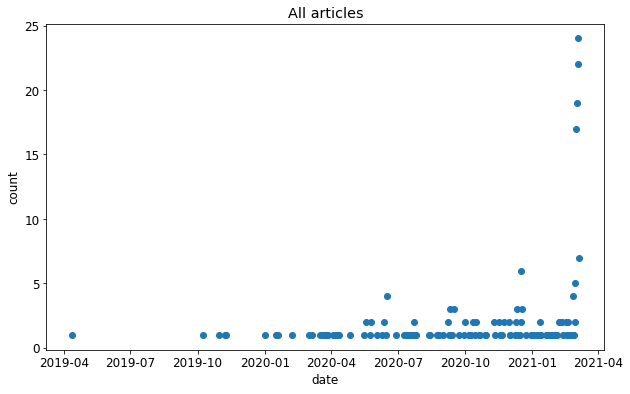

In [293]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(df.date.dt.date).size().plot(style="o")
ax.set_ylabel("count")
ax.set_title("All articles")
plt.show()

Notes: The current dataset looks very limited to more recent articles

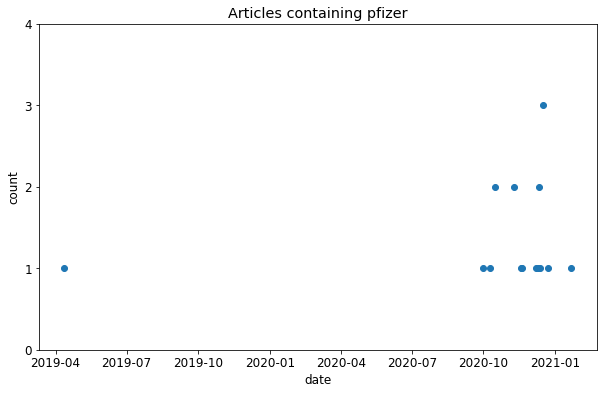

In [362]:
pzifer=df[df.article_title.str.lower().str.contains('pfizer')]
fig, ax = plt.subplots(figsize=(10, 6))
pzifer.groupby(pzifer.date.dt.date).size().plot(style="o")
ax.set_ylabel("count")
ax.set_title("Articles containing pfizer")
ax.set_ylim(0)
ax.set_yticks([0, 1, 2, 3, 4])
plt.show()

In [370]:
df[df.article_title.str.lower().str.contains('politico')]

,publisher,date,link,article_title
170,politico,2020-11-30,https://www.politico.com/newsletters/playbook-pm/2020/11/30/scary-coronavirus-numbers-and-a-new-relief-effort-491012,"POLITICO Playbook PM: Scary coronavirus numbers, and a new relief effort"
221,politico,2020-06-16,https://www.politico.com/newsletters/playbook-pm/2020/06/16/a-peek-inside-trumps-mind-489545,POLITICO Playbook PM: A peek inside Trump’s mind
223,politico,2020-07-15,https://www.politico.com/newsletters/playbook-pm/2020/07/15/trumps-new-attack-on-biden-489809,POLITICO Playbook PM: Trump’s new attack on Biden
225,politico,2020-09-11,https://www.politico.com/newsletters/playbook/2020/09/11/the-politics-of-tragedy-490302,POLITICO Playbook: The politics of tragedy
226,politico,2020-06-10,https://www.politico.com/newsletters/playbook-pm/2020/06/10/news-white-house-crafting-police-overhaul-executive-order-489486,POLITICO Playbook PM: White House crafting police overhaul executive order


Notes: There are some article titles that contain a heading for the publisher that could be removed

In [152]:
# Import/download nltk packages
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Camille\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Camille\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Camille\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [363]:
# User-Entered Parameters
textcolumn = "article_title"
lowercase = True 
strip_non_alpha = True
remove_stopwords = True
use_default_stopwords = False
user_defined_stopwords = ["vaccine","to","for","in","of","the","coronavirus","s","on","vaccines","and","covid","is","by","a","as","at","from","with","are","vaccination","its","PoliticoPlaybook","get","says"]
lemmatize_stem_algorithm = "none" #other options are "porter" and "wordnet"
subs = {'Johnson & Johnson': 'JohnsonandJohnson',
        'White House': 'WhiteHouse',
        'Boris Johnson':'BorisJohnson',
        'J&J': 'JohnsonandJohnson',
        'POLITICO Playbook': 'PoliticoPlaybook',
        'West Virginia': 'WestVirginia'}
number_top_words = 50
number_top_bigrams = 15


Notes: In the first round I noticed that there are certain words that we would want to avoid splitting up which for a quick fix I added to subs. In the future probably want to do some NER to better identify and adjust:
(('johnson', 'johnson'), 13),
 (('boris', 'johnson'), 11),
 (('j', 'j'), 8),
 (('politico', 'playbook'), 5),
 (('white', 'house'), 4),

In [356]:
# list English stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Notes:
The typical stopwords would remove many verbs which we need to understand sentiment and also we need to consider contractions to understand the not cases of verbs


In [357]:
# Create list of text column values
doc = pd.Series.tolist(df[textcolumn])

# Create sentence and word tokens using NLTK tokenizers
sentences = [sent_tokenize(i) for i in doc]
tokenized_sentences = [word_tokenize(i) for i in doc]
words= []
for s in sentences:
    for from_, to in subs.items():
        s[0] = re.sub(from_, to, s[0], flags=re.IGNORECASE)
        for i in s:
            words += word_tokenize(i)  
        
# Lowercase word tokens
if lowercase == True:
    words = [w.lower() for w in words]
    tokenized_sentences = [[w.lower() for w in s] for s in tokenized_sentences]
    
# Strip non-alphabetic tokens
if strip_non_alpha == True:
    words = [w for w in words if w.isalpha()]
    tokenized_sentences = [[w for w in s if w.isalpha()] for s in tokenized_sentences]

# Remove stopwords from tokens
if use_default_stopwords == True:
    stopwords_all = stopwords.words('english')+user_defined_stopwords
    stopwords_all = [sw for sw in stopwords_all if sw not in ["not","no"]] #modification to keep in negatives
else:
    stopwords_all = user_defined_stopwords    

if remove_stopwords == True:
    words = [w for w in words if w not in stopwords_all]
    tokenized_sentences = [[w for w in s if w not in stopwords_all] for s in tokenized_sentences]
       
# Stem/lemmatize word tokens
if lemmatize_stem_algorithm == "wordnet":
    wordnet_lemmatizer = WordNetLemmatizer() 
    words = [wordnet_lemmatizer.lemmatize(w) for w in words]
    tokenized_sentences = [[wordnet_lemmatizer.lemmatize(w) for w in s] for s in tokenized_sentences]
elif lemmatize_stem_algorithm == "porter":
    porter = PorterStemmer() 
    words = [porter.stem(w) for w in words]
    tokenized_sentences = [[porter.stem(w) for w in s] for s in tokenized_sentences]
else:
    words = words
    
#print("Some tokenized sentences:",tokenized_sentences[:4])
#print("\nSome sentences:",sentences[:4])
#print("\nSome words:",words[:15])

In [364]:
# Top Words List
counts = Counter(words) #count words
counts.most_common(number_top_words) #display most common

[('doses', 150),
 ('trump', 144),
 ('biden', 126),
 ('pfizer', 108),
 ('vax', 102),
 ('johnsonandjohnson', 102),
 ('moderna', 96),
 ('fda', 84),
 ('after', 78),
 ('new', 72),
 ('astrazeneca', 66),
 ('immunity', 66),
 ('up', 54),
 ('more', 54),
 ('virus', 54),
 ('j', 48),
 ('over', 48),
 ('borisjohnson', 44),
 ('amid', 42),
 ('what', 42),
 ('health', 42),
 ('panel', 42),
 ('t', 36),
 ('canada', 36),
 ('may', 36),
 ('eu', 36),
 ('not', 36),
 ('first', 36),
 ('shot', 36),
 ('shots', 36),
 ('week', 36),
 ('could', 36),
 ('israel', 30),
 ('down', 30),
 ('state', 30),
 ('public', 30),
 ('should', 30),
 ('emergency', 30),
 ('latest', 30),
 ('next', 30),
 ('police', 30),
 ('effective', 30),
 ('seek', 30),
 ('authorization', 30),
 ('mask', 24),
 ('half', 24),
 ('uk', 24),
 ('backs', 24),
 ('cdc', 24),
 ('plan', 24)]

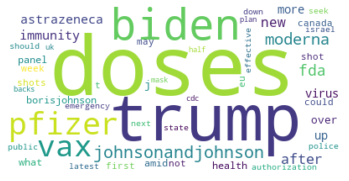

In [366]:
# Top Words Cloud
wordcloud = WordCloud(background_color="white",max_words=number_top_words)
wordcloud.fit_words(counts)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [368]:
# Top Bigrams
counts = Counter(zip(words, words[1:])) #count words
counts.most_common(number_top_bigrams) #display most common

[(('j', 'j'), 24),
 (('boris', 'johnson'), 22),
 (('politico', 'playbook'), 20),
 (('mask', 'mandate'), 18),
 (('panel', 'recommends'), 18),
 (('promising', 'results'), 18),
 (('herd', 'immunity'), 18),
 (('biden', 'administration'), 18),
 (('doses', 'biden'), 18),
 (('fda', 'authorization'), 18),
 (('warp', 'speed'), 18),
 (('playbook', 'pm'), 16),
 (('michael', 'moore'), 12),
 (('don', 't'), 12),
 (('catholic', 'scholars'), 12)]

Notes: Looks like there is still have some clean-up to bring together some of these into a single token